In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d muratkokludataset/rice-image-dataset

 92% 201M/219M [00:02<00:00, 104MB/s] 
100% 219M/219M [00:02<00:00, 78.0MB/s]


In [ ]:
! unzip rice-image-dataset.zip 

In [6]:
rice_path = "/content/Rice_Image_Dataset"

In [75]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [29]:
image_gen = ImageDataGenerator(
    rescale = 1.0/255.0,
    validation_split=0.2
)
train_batches = image_gen.flow_from_directory(
    directory = rice_path,
    target_size=(128,128),
    batch_size = 32,
    subset='training',
    class_mode='categorical'
)
validation_batches = image_gen.flow_from_directory(
    directory = rice_path,
    target_size = (128,128),
    batch_size = 32,
    subset = 'validation',
    class_mode='categorical'
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 32, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [46]:
train_batches.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [43]:
imgs,labels = next(train_batches)
print(imgs.shape)
print(labels.shape)

(32, 128, 128, 3)
(32, 5)


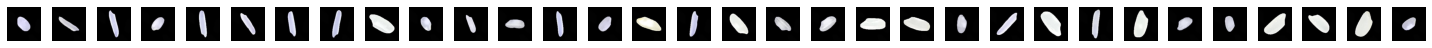

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [44]:
plotImages(imgs)
labels

In [62]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(4,4))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_21 (Dense)            (None, 64)               

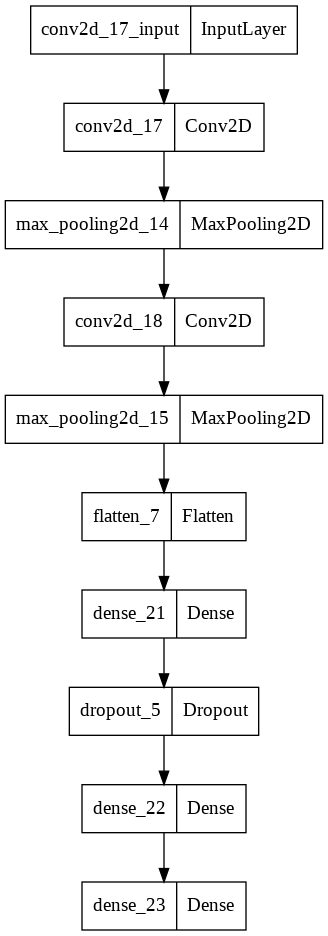

In [64]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [65]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.fit(train_batches,batch_size=32,epochs=3,validation_data=validation_batches)

Epoch 1/3
1875/1875 [==============================] - 108s 57ms/step - loss: 0.2131 - accuracy: 0.9250 - val_loss: 0.0856 - val_accuracy: 0.9710
Epoch 2/3
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1251 - accuracy: 0.9587 - val_loss: 0.0770 - val_accuracy: 0.9753
Epoch 3/3
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1049 - accuracy: 0.9660 - val_loss: 0.0662 - val_accuracy: 0.9812


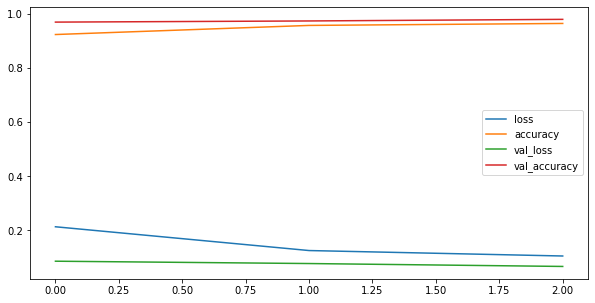

In [70]:
pd.DataFrame(model.history.history).plot(figsize=(10,5))
plt.show()

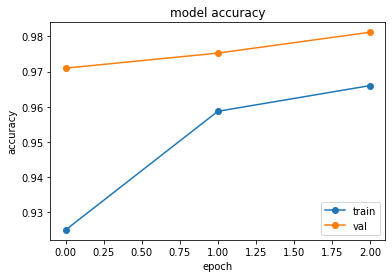

In [72]:
plt.plot(model.history.history['accuracy'], marker='o')
plt.plot(model.history.history['val_accuracy'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

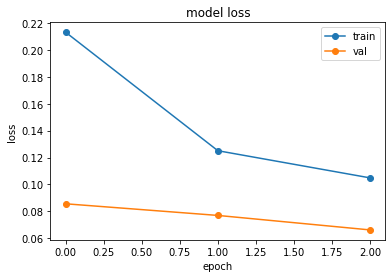

In [73]:
plt.plot(model.history.history['loss'], marker='o')
plt.plot(model.history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()